In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf


In [35]:
import random

In [18]:
import matplotlib.pyplot as plt

In [2]:
X = tf.reshape(tf.range(12, dtype=tf.float32), (3, 4))
Y = tf.constant([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
tf.concat([X, Y], axis=0), tf.concat([X, Y], axis=1)

(<tf.Tensor: shape=(6, 4), dtype=float32, numpy=
 array([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [ 2.,  1.,  4.,  3.],
        [ 1.,  2.,  3.,  4.],
        [ 4.,  3.,  2.,  1.]], dtype=float32)>,
 <tf.Tensor: shape=(3, 8), dtype=float32, numpy=
 array([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
        [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
        [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]], dtype=float32)>)

In [14]:
x = tf.range(4, dtype=tf.float32)
x = tf.Variable(x)

In [15]:
with tf.GradientTape() as t:
    y = 2 * tf.tensordot(x, x, axes=1)
y

<tf.Tensor: shape=(), dtype=float32, numpy=28.0>

In [16]:
x_grad = t.gradient(y, x)
x_grad

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([ 0.,  4.,  8., 12.], dtype=float32)>

In [17]:
def synthetic_data(w, b, num_examples):  #@save
    """Generate y = Xw + b + noise."""
    X = tf.zeros((num_examples, w.shape[0]))
    X += tf.random.normal(shape=X.shape)# add noise
    y = tf.matmul(X, tf.reshape(w, (-1, 1))) + b
    y += tf.random.normal(shape=y.shape, stddev=0.01) # add noise
    y = tf.reshape(y, (-1, 1))
    return X, y

true_w = tf.constant([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)


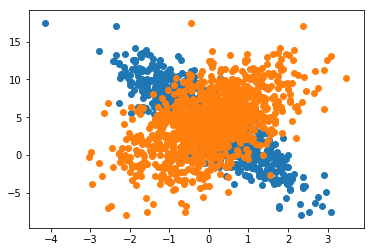

In [50]:
plt.scatter(features[:,1],labels)
plt.scatter(features[:,0],labels)

In [33]:
def data_iter(batch_size,features,labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = tf.constant(indices[i: min(i + batch_size, num_examples)])
        yield tf.gather(features, j), tf.gather(labels, j)

In [29]:
def linreg(X,w,b):
    return tf.matmul(X, w) + b

In [30]:
def sqrd_loss(y_hat,y):
    return (y_hat - tf.reshape(y,y_hat.shape))**2/2

In [31]:
def sgd(params,grads,lr,batchsize):
    for param,grad in zip(params,grads):
        param.assign_sub(lr*grad/batchsize)

In [47]:
#initiaizing parameters
w = tf.Variable(tf.random.normal(shape=(2, 1), mean=0, stddev=0.01),
                trainable=True)
b = tf.Variable(tf.zeros(1), trainable=True)
lr = 0.03
num_epochs=6
net = linreg
batch_size = 20
loss = sqrd_loss

for epoch in range(num_epochs):
    for X,y in data_iter(batch_size,features,labels):
        with tf.GradientTape() as g:
            l = loss(net(X,w,b),y)
        dw,db = g.gradient(l,[w,b])
        sgd([w,b],[dw,db],lr,batch_size)
    training_loss = loss(net(features,w,b),labels)
    print(f'epoch{epoch+1},loss{float(tf.reduce_mean(training_loss)):f}')

epoch1,loss0.747637
epoch2,loss0.033399
epoch3,loss0.001543
epoch4,loss0.000118
epoch5,loss0.000054
epoch6,loss0.000050


In [48]:
print(f'error in estimating w: {true_w - tf.reshape(w, true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: [-0.0004878  -0.00025821]
error in estimating b: [-0.00018597]


In [52]:
y = np.array([0,2])
y_hat = np.array([[0.1,0.3,0.6],[0.3,0.2,0.5]])
y_hat[[0,1],y]

array([0.1, 0.5])

In [53]:
def cross_entropy(y_hat,y):
    return -np.log(y_hat[range(len(y_hat)),y])

cross_entropy(y_hat,y)

array([2.30258509, 0.69314718])